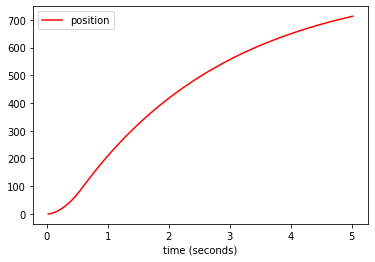

In [1]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.utils.time import *
from lib.system.basic import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("pos", "position")

dds = DDS()
dds.start()

dds.subscribe(['speed'])
dds.publish('force', 5000.0, DDS.DDS_TYPE_FLOAT)

t = Time()

integr = Integrator()

t.start()
while t.get() < 5:
    
    v = dds.wait('speed')
    delta_t = t.elapsed()
    
    p = integr.evaluate(delta_t, v)
    
    dds.publish('force', 0.0, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("pos", p)

dp.plot()
